In [1]:
import pandas as pd
import datetime as dt
from prophet import Prophet

data = pd.read_csv("../raw_data/AMZN 2020-2021.csv",parse_dates = True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-10,2645.000000,2722.350098,2626.260010,2647.449951,2647.449951,4946000
1,2020-06-11,2603.500000,2671.379883,2536.229980,2557.959961,2557.959961,5800100
2,2020-06-12,2601.209961,2621.479980,2503.350098,2545.020020,2545.020020,5436100
3,2020-06-15,2526.600098,2584.000000,2508.000000,2572.679932,2572.679932,3865100
4,2020-06-16,2620.000000,2620.000000,2576.000000,2615.270020,2615.270020,3585600


In [2]:
data.shape

(253, 7)

In [4]:
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [6]:
import numpy as np

#stocks_df= data[(data.symbol=="JPM")]
#stocks_df= stocks_df[(data.date.dt.year == 2017) | (data.date.dt.year == 2018)]
#stocks_df= stocks_df[(stocks_df.date.dt.year > 2015 ) & (stocks_df.date.dt.year < 2021)]
#stocks_df.sort_values(by=["date"], inplace=True)
#stocks_df

In [7]:
#import numpy as np

#stocks_df= data[(data.symbol=="JPM")]
#stocks_df = stocks_df[(data.date.dt.year == 2016) | (data.date.dt.year == 2020)]
#stocks_df.sort_values(by=["date"], inplace=True)
#stocks_df

# Selectionner 10 actions de secteurs differents sur une periode de deux ans.
# GS,WMT,AAPL,AMZN,JPM,BA,CCL,CVX,KO,MSFT


In [8]:
data = data[["Date", "Adj Close"]].copy()  #à verifier, si il faut garder le .copy() ou pas
data.rename(columns={"Date": "ds", "Adj Close": "y"}, inplace=True)
data

,ds,y
0,2020-06-10,2647.449951
1,2020-06-11,2557.959961
2,2020-06-12,2545.020020
3,2020-06-15,2572.679932
4,2020-06-16,2615.270020
...,...,...
248,2021-06-04,3206.219971
249,2021-06-07,3198.010010
250,2021-06-08,3264.110107
251,2021-06-09,3281.149902


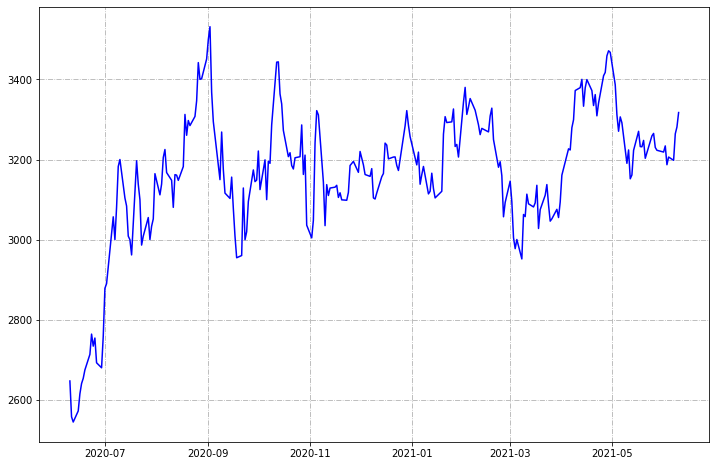

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.grid(linestyle='-.')

plt.plot(data['ds'], data['y'], 'b')
plt.show()

In [10]:
index=round(len(data)*80/100)
index

202

In [11]:
train = data.iloc[:index]
test = data.iloc[index:]

In [12]:
train.shape, test.shape

((202, 2), (51, 2))

In [13]:
train

,ds,y
0,2020-06-10,2647.449951
1,2020-06-11,2557.959961
2,2020-06-12,2545.020020
3,2020-06-15,2572.679932
4,2020-06-16,2615.270020
...,...,...
197,2021-03-23,3137.500000
198,2021-03-24,3087.070068
199,2021-03-25,3046.260010
200,2021-03-26,3052.030029


In [16]:
model = Prophet(seasonality_mode='multiplicative', interval_width=0.95)
model.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
horizon = 12
future = model.make_future_dataframe(periods=horizon, freq='MS')
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
209,2021-11-01,2338.482436,965.957722,3709.620180
210,2021-12-01,2250.725420,597.902079,3844.226765
211,2022-01-01,-529.127948,-1032.621453,-8.223072
212,2022-02-01,2043.731531,-209.686372,4246.686994
213,2022-03-01,1951.708055,-622.061155,4494.102347


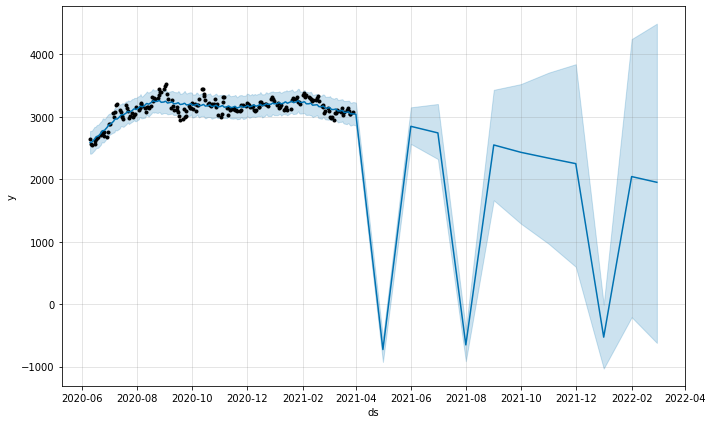

In [19]:
ax = model.plot(forecast);

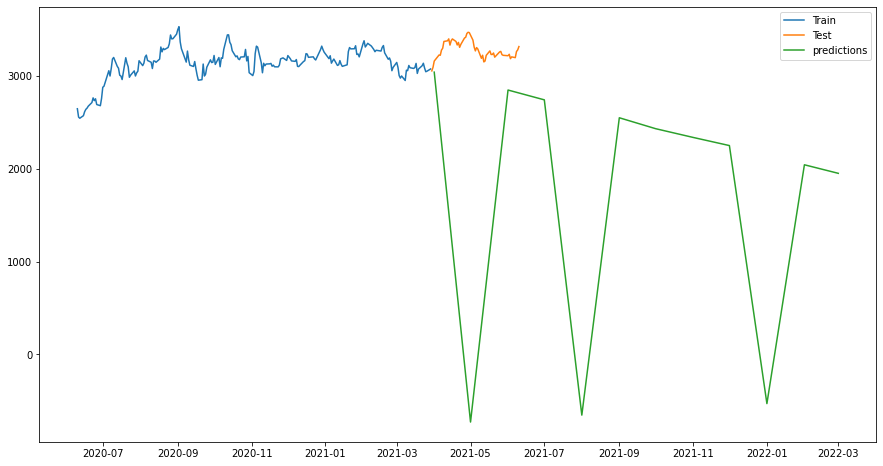

In [20]:
plt.figure(figsize=(15, 8))
plt.plot(train['ds'], train['y'], label="Train")
plt.plot(test['ds'], test['y'], label="Test")
plt.plot(forecast[-horizon:]['ds'], forecast[-horizon:]['yhat'], label="predictions")
plt.legend(loc="best")
plt.show()

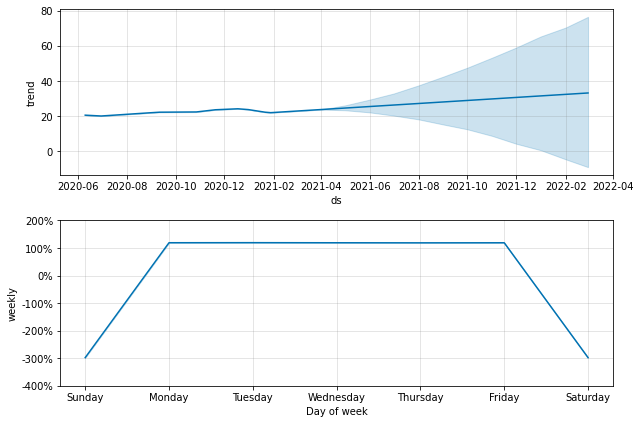

In [18]:
model.plot_components(forecast);

In [21]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
# Your code here
cv_results = cross_validation(model=model, initial=f'{20 * 5} days', horizon='35 days', period='180 days')

# Comment choisir le chiffre initial {XX*5} et horizon 'XX days' (ici initial=20 et horizon=75)

INFO:prophet:Making 1 forecasts with cutoffs between 2021-02-22 00:00:00 and 2021-02-22 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
cv_results

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-02-23,3296.408079,3118.872731,3472.799152,3194.500000,2021-02-22
1,2021-02-24,3306.466183,3131.252084,3487.610998,3159.530029,2021-02-22
2,2021-02-25,3298.500150,3136.934957,3477.296678,3057.159912,2021-02-22
3,2021-02-26,3282.274115,3100.952323,3465.483805,3092.929932,2021-02-22
4,2021-03-01,3296.456573,3114.006884,3485.983543,3146.139893,2021-02-22
5,2021-03-02,3307.345813,3125.492048,3482.726873,3094.530029,2021-02-22
6,2021-03-03,3317.432093,3143.234820,3493.608546,3005.000000,2021-02-22
7,2021-03-04,3309.434459,3137.176796,3489.918852,2977.570068,2021-02-22
8,2021-03-05,3293.149486,3116.531520,3466.716417,3000.459961,2021-02-22
9,2021-03-08,3307.363447,3132.112141,3476.736982,2951.949951,2021-02-22


In [23]:
data_p = performance_metrics(cv_results)
data_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,2 days,15987.745072,126.442655,124.422117,0.039203,0.039203,0.038425,1.0
1,3 days,39917.671883,199.794074,194.138196,0.062724,0.062724,0.060697,0.5
2,4 days,47048.164918,216.905890,215.342210,0.070081,0.070081,0.067673,0.0
3,7 days,29223.161875,170.947834,169.830431,0.054498,0.054498,0.053032,0.5
4,8 days,33942.831041,184.235803,181.566232,0.058275,0.058275,0.056574,0.5
5,9 days,71452.185178,267.305416,262.623938,0.086371,0.086371,0.082659,0.0
6,10 days,103873.893161,322.294730,322.148242,0.107713,0.107713,0.102202,0.0
7,11 days,97900.565835,312.890661,312.276958,0.104501,0.104501,0.099292,0.0
8,14 days,105992.955554,325.565593,324.051510,0.108974,0.108974,0.103287,0.0
9,15 days,95782.499938,309.487479,305.423472,0.101898,0.101898,0.096811,0.0


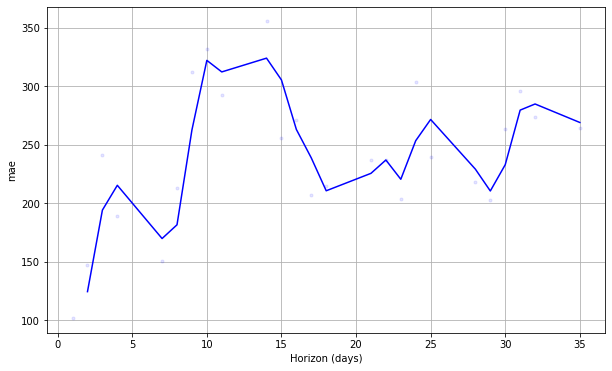

In [24]:
# Plot results below
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(cv_results, metric='mae');